#AUGMENTASI DATA

##Import Library dan Load Dataset

In [1]:
from sklearn.utils import resample
import pandas as pd

original_data = pd.read_csv('/content/Student_performance.csv')
print(f"Ukuran dataset asli: {original_data.shape}")

Ukuran dataset asli: (4424, 37)


##Tentukan Target Augmentasi

In [2]:
original_size = original_data.shape[0]
augmentation_target = original_size * 4

print(f"Target ukuran dataset hasil augmentasi: {augmentation_target}")

Target ukuran dataset hasil augmentasi: 17696


##Augmentasi Data Menggunakan Resampling

In [3]:
# Lakukan augmentasi data dengan resampling
augmented_data = resample(
    original_data,
    replace=True,
    n_samples=augmentation_target - original_size,
    random_state=42
)

print(f"Ukuran data tambahan: {augmented_data.shape}")

Ukuran data tambahan: (13272, 37)


##Gabungkan Data Asli dan Augmented

In [4]:
final_augmented_data = pd.concat([original_data, augmented_data], ignore_index=True)

print(f"Ukuran dataset akhir setelah augmentasi: {final_augmented_data.shape}")

Ukuran dataset akhir setelah augmentasi: (17696, 37)


##Simpan Dataset Augmented

In [5]:
final_augmented_data.to_csv('/content/augmented_dataset.csv', index=False)

print("Dataset hasil augmentasi telah disimpan sebagai 'augmented_dataset.csv'")

Dataset hasil augmentasi telah disimpan sebagai 'augmented_dataset.csv'


#Penggunaan Model Deep Learning

##Persiapan Data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

data = pd.read_csv('/content/augmented_dataset.csv')

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Target'])
y = data['Target']

# Encode target label menjadi nilai numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model 1 - Feedforward Neural Network

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Definisikan model Feedforward Neural Network
model_ffnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer untuk binary classification
])

# Kompilasi model
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2842 - loss: -193.2847 - val_accuracy: 0.3729 - val_loss: -3602.2769
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3689 - loss: -8270.6572 - val_accuracy: 0.3740 - val_loss: -30638.1680
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3663 - loss: -45121.3828 - val_accuracy: 0.3726 - val_loss: -99772.8750
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3558 - loss: -134151.0312 - val_accuracy: 0.3720 - val_loss: -223928.0938
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3558 - loss: -276557.6875 - val_accuracy: 0.3740 - val_loss: -412903.8125
Epoch 6/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3570 - loss: -490170.4688 - val_accuracy: 0.3729 - val_loss: -676538.0000
Epoch 7/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3522 - loss: -780190.3750 - val_accuracy: 0.3720 - val_loss: -1020169.9375
Epoch 8/20
443/443 ━━━━━━━━━━

#Model 2 - XGBoost

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Definisikan model XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Latih model
model_xgb.fit(X_train, y_train)

# Prediksi menggunakan model XGBoost
y_pred_xgb = model_xgb.predict(X_test)

# Evaluasi performa XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Accuracy (XGBoost): {accuracy_xgb}")
print(f"F1-Score (XGBoost): {f1_xgb}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:21:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (XGBoost): 0.9734463276836158
F1-Score (XGBoost): 0.9733140913804246


##Evaluasi dan Perbandingan Model

In [9]:
from sklearn.metrics import classification_report

# Evaluasi Feedforward Neural Network
y_pred_ffnn = (model_ffnn.predict(X_test) > 0.5).astype("int32")
accuracy_ffnn = accuracy_score(y_test, y_pred_ffnn)
f1_ffnn = f1_score(y_test, y_pred_ffnn, average='weighted')

print(f"Accuracy (Feedforward Neural Network): {accuracy_ffnn}")
print(f"F1-Score (Feedforward Neural Network): {f1_ffnn}")

# Tampilkan laporan klasifikasi untuk kedua model
print("\nFeedforward Neural Network - Classification Report:")
print(classification_report(y_test, y_pred_ffnn))

print("\nXGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy (Feedforward Neural Network): 0.3748587570621469
F1-Score (Feedforward Neural Network): 0.30401387172091743

Feedforward Neural Network - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1144
           1       0.21      0.81      0.33       664
           2       0.00      0.00      0.00      1732

    accuracy                           0.37      3540
   macro avg       0.34      0.50      0.36      3540
weighted avg       0.30      0.37      0.30      3540


XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1144
           1       0.96      0.92      0.94       664
           2       0.97      0.99      0.98      1732

    accuracy                           0.97      3540
   macro avg       0.97      0.96      0.97      3540
weighted avg       0.97      0.97      0.97     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Model XGBoost

In [69]:
import pandas as pd

data = pd.read_csv('/content/augmented_dataset.csv')
print(f"Jumlah data keseluruhan: {data.shape[0]} baris dan {data.shape[1]} kolom")
print("Data head (5 baris pertama):")
display(data.head())

Jumlah data keseluruhan: 17696 baris dan 37 kolom
Data head (5 baris pertama):


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [70]:
selected_columns = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Previous qualification (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (approved)'
]
X = data[selected_columns]
y = data['Target']


In [71]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


Distribusi Kelas Target Sebelum Oversampling:
2    8842
0    5659
1    3195
Name: count, dtype: int64


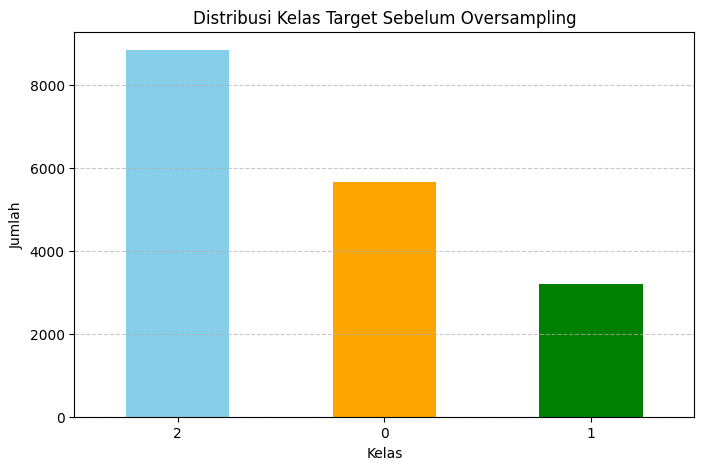

In [72]:
import matplotlib.pyplot as plt

print("\nDistribusi Kelas Target Sebelum Oversampling:")
print(pd.Series(y).value_counts())

plt.figure(figsize=(8, 5))
pd.Series(y).value_counts().plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribusi Kelas Target Sebelum Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Distribusi Kelas Target Setelah Oversampling:
0    8842
2    8842
1    8842
Name: count, dtype: int64


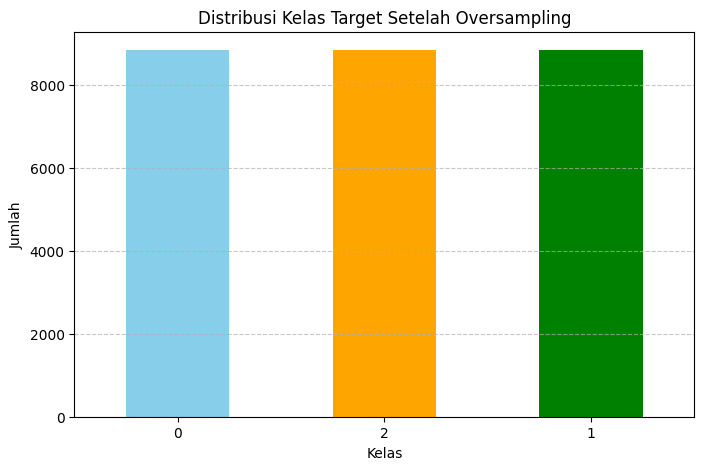

In [73]:
from imblearn.over_sampling import SMOTE

# Lakukan oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nDistribusi Kelas Target Setelah Oversampling:")
print(pd.Series(y_resampled).value_counts())

plt.figure(figsize=(8, 5))
pd.Series(y_resampled).value_counts().plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Distribusi Kelas Target Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print(f"\nJumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 21220
Jumlah data uji: 5306


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData berhasil distandarisasi.")


Data berhasil distandarisasi.


In [76]:
from xgboost import XGBClassifier

# Latih model XGBoost
model_xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(X_train, y_train)
print("\nModel berhasil dilatih.")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:52:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model berhasil dilatih.


In [77]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

print("\nClassification Report:")
target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.9319638145495666

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.93      0.93      0.93      1777
    Enrolled       0.92      0.93      0.93      1734
    Graduate       0.94      0.94      0.94      1795

    accuracy                           0.93      5306
   macro avg       0.93      0.93      0.93      5306
weighted avg       0.93      0.93      0.93      5306



In [78]:
from joblib import dump

dump(scaler, 'scaler.pkl')
print("\nScaler disimpan sebagai 'scaler.pkl'")
dump(model_xgb, 'model.pkl')
print("Model disimpan sebagai 'model.pkl'")


Scaler disimpan sebagai 'scaler.pkl'
Model disimpan sebagai 'model.pkl'
